In [1]:
import numpy as np
import pandas as pd
import thinfilm as tm
import material as ml
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution, minimize

R_scan = pd.read_csv('./spectrum/LENS/rev2/R_5_B.csv')['SCAN'].values
wl = np.linspace(400, 700, 301)

air = ml.Non_Dispersion(1)
SiO2 = ml.open_material('SiO2_LENS', 'Sellmeier') 
SiN = ml.open_material('SiN_LENS', 'Sellmeier')
ITO = ml.open_material('ITO_LENS', 'Sellmeier')
OC = ml.open_material('OC_HRI_LENS', 'Material')
sodalime = ml.open_material('sodalime', 'Material')

R_hypo = lambda th: tm.Design(
    [air,  SiN, SiO2, OC, ITO, SiO2, SiN, sodalime],
    [None, th[0], th[1], th[2], th[3], th[4], th[5], None]
).reflectance(wl, 5)

fom = lambda th:sum(abs(R_hypo(th)-R_scan/100))

In [4]:
sol = differential_evolution(fom, [(10,40),(20,40),(1500,2200),(20,30),(20,40),(8,40)])
print(sol.x)

[  28.2594266    20.         1840.17816855   27.16582897   35.30283345
    8.69928171]


In [ ]:
sol2 = minimize(fom, sol.x)
print(sol2.x)

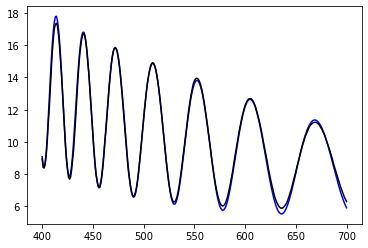

In [5]:
plt.plot(wl, 100*R_hypo(sol.x), '-b')
plt.plot(wl, R_scan, '-k')
plt.show()